# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/briarmercier/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("api_key")

In [11]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q ="Bitcoin",language="en")             

In [17]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(q="Ethereum",language="en")

In [12]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sen = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        title = article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        bitcoin_sen.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Bitcoin title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass

In [13]:
bcoin_df = pd.DataFrame(bitcoin_sen)

In [14]:
cols = ["Compound", "Negative", "Neutral", "Positive", "Bitcoin title", "text"]
bcoin_df = bcoin_df[cols]

bcoin_df.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,0.2960,0.0,0.942,0.058,What Square’s smashing earnings tell us about ...,Shares of Square are up more than 6% today aft...
1,0.0000,0.0,1.000,0.000,Tesla sees bitcoin as important financial tool...,Tesla’s relationship with bitcoin is not a dal...
2,0.7506,0.0,0.829,0.171,"You Can Now Exchange Crypto on Venmo, If You'r...",Cryptocurrency continues to gain mainstream ac...
3,0.6124,0.0,0.865,0.135,African crypto usage spurs Luno as customers r...,The crypto industry as a whole has seen a mome...
4,0.0000,0.0,1.000,0.000,Crypto market takes a dive with Bitcoin leadin...,Cryptocurrency prices continued to tumble Frid...


In [18]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        title = article['title']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        
        
        ethereum_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Ethereum title": title,
             "text": text,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
    
# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Ethereum title", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()
    

,Compound,Negative,Neutral,Positive,Ethereum title,text
0,-0.4019,0.15,0.778,0.072,Radical Ethereum entrepreneurs are redefining ...,Their investors call them disruptive innovator...
1,0.7506,0.00,0.829,0.171,"You Can Now Exchange Crypto on Venmo, If You'r...",Cryptocurrency continues to gain mainstream ac...
2,0.0258,0.00,0.966,0.034,Venmo now lets users buy and sell Bitcoin and ...,Venmo is jumping aboard the cryptocurrency ban...
3,0.0000,0.00,1.000,0.000,"Move over, Bitcoin. Ethereum is at an all-time...",New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.00,0.909,0.091,CryptoPunks maker Larva Labs launches their ne...,"The creators behind CryptoPunks, one of the mo..."


In [19]:
# Describe the Bitcoin Sentiment
bcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.284405,0.010300,0.911300,0.078450
std,0.349831,0.025375,0.083582,0.078992
min,-0.381800,0.000000,0.777000,0.000000
25%,0.000000,0.000000,0.828250,0.000000
50%,0.296000,0.000000,0.927000,0.062000
75%,0.634375,0.000000,1.000000,0.160250
max,0.845500,0.080000,1.000000,0.217000


In [20]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.111150,0.011200,0.946050,0.042750
std,0.299861,0.036611,0.071028,0.059798
min,-0.401900,0.000000,0.778000,0.000000
25%,0.000000,0.000000,0.924000,0.000000
50%,0.000000,0.000000,0.964000,0.017000
75%,0.164300,0.000000,1.000000,0.064500
max,0.817600,0.150000,1.000000,0.210000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: Both had high scores but ETH the highest wtih 0.817

Q. Which coin had the highest positive score?

A: Eth has the highest max positive score (0.21) vs (0.17) for Bitcoin.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [43]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 


# Create a list of stopwords
stop = stopwords.words('english')


# Expand the default stopwords list if necessary
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
# Complete the tokenizer function

#def tokenizer(text):
   # """Tokenizes text."""
    #sw = set(stopwords.words('english'))
    #regex = re.compile("[^a-zA-Z ]")
    #re_clean = regex.sub('', text)
   #words = word_tokenize(re_clean)
    #lemmatizer = WordNetLemmatizer()
    #return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in sw]

In [46]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [47]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = bcoin_df.copy()
bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Bitcoin title,text
0,0.2960,0.0,0.942,0.058,What Square’s smashing earnings tell us about ...,Shares of Square are up more than 6% today aft...
1,0.0000,0.0,1.000,0.000,Tesla sees bitcoin as important financial tool...,Tesla’s relationship with bitcoin is not a dal...
2,0.7506,0.0,0.829,0.171,"You Can Now Exchange Crypto on Venmo, If You'r...",Cryptocurrency continues to gain mainstream ac...
3,0.6124,0.0,0.865,0.135,African crypto usage spurs Luno as customers r...,The crypto industry as a whole has seen a mome...
4,0.0000,0.0,1.000,0.000,Crypto market takes a dive with Bitcoin leadin...,Cryptocurrency prices continued to tumble Frid...


In [48]:
# Create a new tokens column for Ethereum
ethereum_tokens = ethereum_df.copy()

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [57]:
# Generate the Bitcoin N-grams where N=2

#bcoin_words = tokenizer(''.join(str(bcoin_df['text'].tolist())))
#bcoin_counts = Counter(ngrams(bcoin_words, n=2))
#print(dict(bcoin_counts))
N = 2
grams = ngrams(tokenizer(bitcoin_tokens.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('said', 'Monday'), 3),
 (('char', 'Cryptocurrency'), 2),
 (('Venmo', 'app'), 2),
 (('institutional', 'investor'), 2),
 (('price', 'continued'), 2),
 (('Jack', 'Dorsey'), 2),
 (('Inc', 'major'), 2),
 (('major', 'bitcoin'), 2),
 (('bitcoin', 'corporate'), 2),
 (('corporate', 'backer'), 2),
 (('backer', 'said'), 2),
 (('Monday', 'non-employee'), 2),
 (('non-employee', 'director'), 2),
 (('director', 'get'), 2),
 (('get', 'fee'), 2),
 (('fee', 'service'), 2),
 (('service', 'bitcoin'), 2),
 (('bitcoin', 'instead'), 2)]

In [58]:
# Generate the Ethereum N-grams where N=2
#ethlist = []
#for sublist in ethereum_tokens:
    #for item in sublist:
        #ethlist.append(list)

eth_words = tokenizer(''.join(str(ethereum_df['text'].tolist())))
eth_counts = Counter(ngrams(eth_words, n=2))
print(dict(eth_counts))



{("'Their", 'investor'): 1, ('investor', 'call'): 1, ('call', 'disruptive'): 1, ('disruptive', 'innovator'): 1, ('innovator', 'Detractors'): 1, ('Detractors', 'like'): 1, ('like', 'North'): 1, ('North', 'Carolina'): 1, ('Carolina', 'Attorney'): 1, ('Attorney', 'General'): 1, ('General', 'Josh'): 1, ('Josh', 'Stein'): 1, ('Stein', 'call'): 1, ('call', 'dirty'): 1, ('dirty', 'scammer'): 1, ('scammer', 'Leda'): 1, ('Leda', 'Health'): 1, ('Health', 'co-founders'): 1, ('co-founders', 'Madison'): 1, ('Madison', 'Campbell'): 1, ('Campbell', 'Liesel'): 1, ('Liesel', 'Vaidya'): 1, ('Vaidya', 'th…'): 1, ('th…', '+8679'): 1, ('+8679', 'char'): 1, ('char', "'Cryptocurrency"): 1, ("'Cryptocurrency", 'continues'): 1, ('continues', 'gain'): 1, ('gain', 'mainstream'): 1, ('mainstream', 'acceptance'): 1, ('acceptance', 'PayPal'): 1, ('PayPal', 'announced'): 1, ('announced', 'added'): 1, ('added', 'Bitcoin'): 1, ('Bitcoin', 'Ethereum'): 1, ('Ethereum', 'Bitcoin'): 1, ('Bitcoin', 'Cash'): 1, ('Cash', 'Li

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top  tokens from the  count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
#token_count(bitcoin_words, N=10)

In [61]:
all_tokens = tokenizer(bitcoin_tokens.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 8),
 ('Reuters', 8),
 ('bitcoin', 7),
 ('Tesla', 5),
 ('cryptocurrency', 5),
 ('Monday', 4),
 ('service', 4),
 ('said', 4),
 ('Staff', 4)]

In [63]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_df, N=10)

[('Compound', 1),
 ('Negative', 1),
 ('Neutral', 1),
 ('Positive', 1),
 ('Ethereum title', 1),
 ('text', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

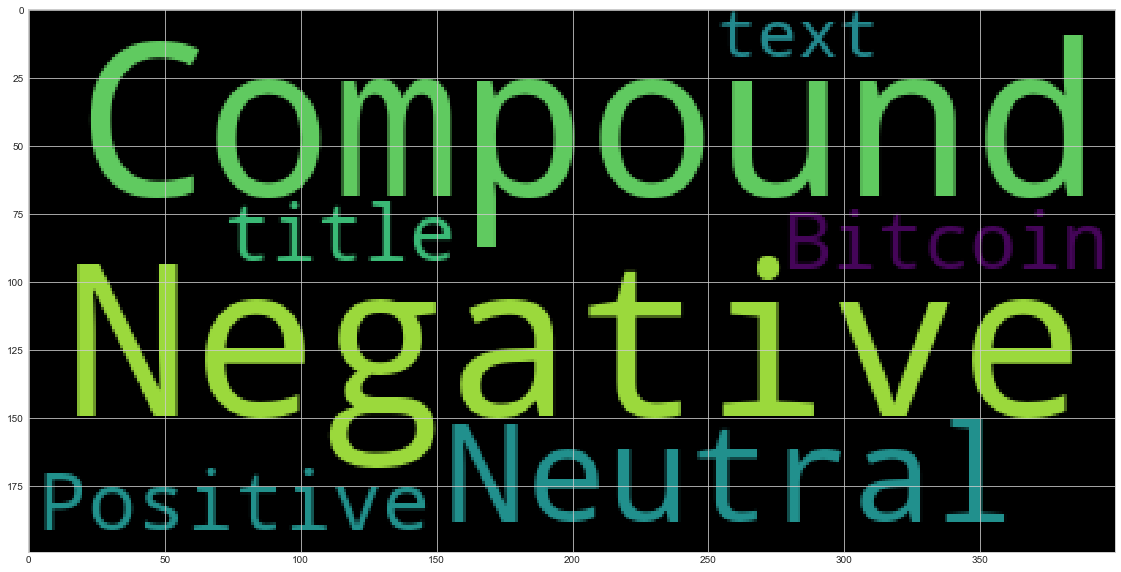

In [67]:
# Generate the Bitcoin word cloud
bcoin_string = " ".join(bitcoin_tokens)
wcount = WordCloud().generate(bcoin_string)
plt.imshow(wcount)

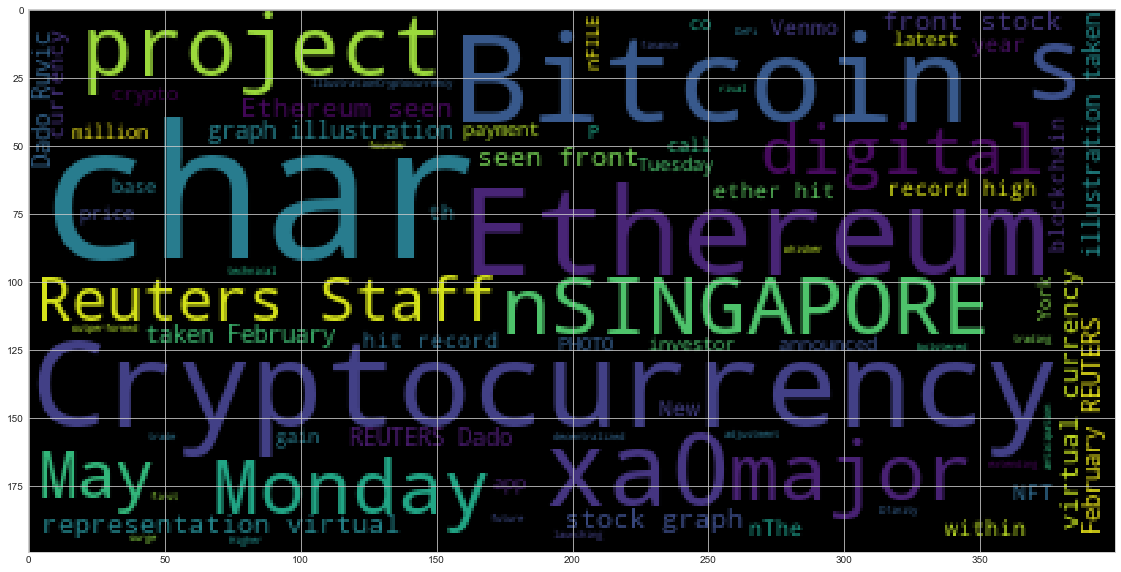

In [68]:
# Generate the Ethereum word cloud
eth_string = " ".join(eth_words)
wcount = WordCloud().generate(eth_string)
plt.imshow(wcount)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [69]:
#pip install -U spacy
import spacy
from spacy import displacy

In [70]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 475 kB/s eta 0:00:01    |███                             | 1.3 MB 3.4 MB/s eta 0:00:04     |██████████████████████▍         | 9.6 MB 6.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [71]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [72]:
# Concatenate all of the Bitcoin text together
bcoin_concat = str(bcoin_df['text'].tolist())
bcoin_concat

'[\'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]\', \'Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]\', \'Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]\', \'The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars]\', \'Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet curre

In [73]:

# Run the NER processor on all of the text
bcoin_doc = nlp(bcoin_concat)

# Add a title to the document
bcoin_doc.user_data["title"] = "Visualization"

In [74]:
# Render the visualization
displacy.render(bcoin_doc, style='ent')

In [75]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

NameError: name 'doc' is not defined

---

### Ethereum NER

In [76]:
# Concatenate all of the Ethereum text together
ethereum_concat = str(ethereum_df['text'].tolist())
ethereum_concat

'[\'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]\', \'Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]\', \'Venmo is jumping aboard the cryptocurrency bandwagon.\\xa0\\r\\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\\xa0\\r\\nFour cr… [+1524 chars]\', "New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars]", \'The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their 

In [77]:
ethereum_doc = nlp(ethereum_concat)

# Add a title to the document
ethereum_doc.user_data["title"] = "Visualization"


In [78]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [79]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

NameError: name 'doc' is not defined

---